##Problem Statement:
An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

1. Using the data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior.


In [161]:
#importing the basic libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [162]:
#importing the dataset:
df = pd.read_csv('/content/OnlineRetail (3).csv',encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [163]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
51105,540641,82483,WOOD 2 DRAWER CABINET WHITE FINISH,4,1/10/2011 13:20,5.95,16497.0,United Kingdom
535610,581217,22446,PIN CUSHION BABUSHKA PINK,6,12/8/2011 9:20,2.46,NaN,United Kingdom
29862,538827,21065,BOOM BOX SPEAKER GIRLS,24,12/14/2010 12:59,1.25,14298.0,United Kingdom
207396,554987,22522,CHILDS GARDEN FORK BLUE,1,5/29/2011 12:48,0.85,14823.0,United Kingdom
148175,549185,84375,SET OF 20 KIDS COOKIE CUTTERS,12,4/7/2011 9:35,2.10,18272.0,United Kingdom
415836,572550,20973,12 PENCIL SMALL TUBE WOODLAND,1,10/24/2011 17:06,1.25,NaN,United Kingdom
446717,574915,84988,SET OF 72 PINK HEART PAPER DOILIES,12,11/7/2011 16:17,1.45,16779.0,United Kingdom
154244,549885,22796,PHOTO FRAME 3 CLASSIC HANGING,6,4/12/2011 15:32,9.95,17204.0,United Kingdom
370776,569202,23393,HOME SWEET HOME CUSHION COVER,1,9/30/2011 17:22,10.79,NaN,United Kingdom
504321,578947,22189,CREAM HEART CARD HOLDER,1,11/27/2011 13:49,3.95,14547.0,United Kingdom


In [164]:
#checking the shape of the data:
df.shape

(541909, 8)

In [165]:
#checking the columns and dtypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [166]:
#checking for duplicated rows:
df.duplicated().sum()

5268

In [167]:
#dropping the dupicates:
df.drop_duplicates(inplace=True,keep='first')

In [168]:
#re-checking for duplicated rows:
df.duplicated().sum()

0

In [169]:
#checking for null values:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

- There is a huge amount of missing values in CustomerID column.

#Analysing the columns:

In [170]:
#checking number of unique values in each col:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [171]:
#checking the unique values in Country:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [172]:
#checking the value counts of each country:
df['Country'].value_counts()

United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

<Axes: xlabel='count', ylabel='Country'>

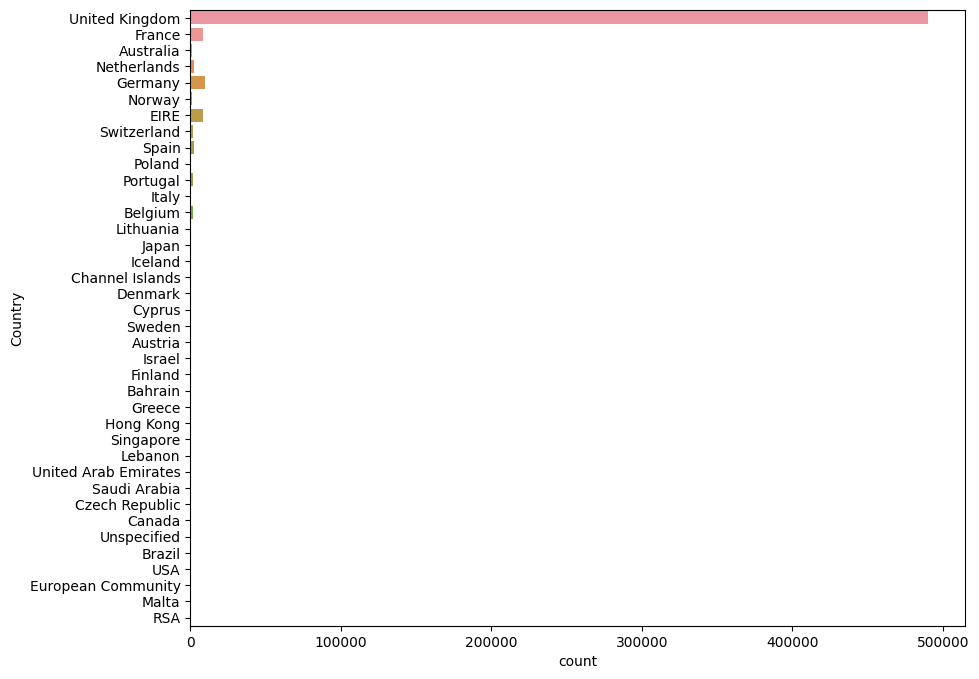

In [173]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,y='Country')

- Majority of the orders are from United Kingdom.

In [174]:
# as more than 90% of the data has orders from UK we will keep only thode records and drop the country column
df = df[(df['Country'] == 'United Kingdom')].drop(columns='Country')
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
519077,580136,22154,ANGEL DECORATION 3 BUTTONS,8,12/1/2011 19:42,0.42,17841.0
411771,572229,23100,SILVER BELLS TABLE DECORATION,24,10/21/2011 14:23,1.25,14329.0
253450,559163,21580,RABBIT DESIGN COTTON TOTE BAG,1,7/6/2011 16:33,1.63,NaN
303894,563557,22563,HAPPY STENCIL CRAFT,12,8/17/2011 13:33,1.25,15786.0
231727,557278,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,12,6/19/2011 12:08,1.25,13089.0


<Axes: xlabel='UnitPrice', ylabel='Density'>

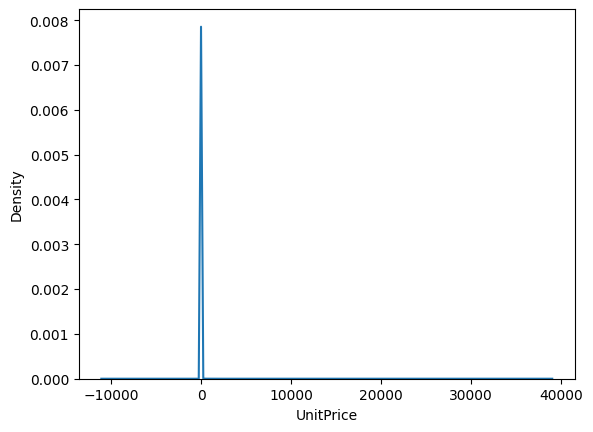

In [175]:
sns.kdeplot(df['UnitPrice'])

In [176]:
#checking the stats of data:
df.describe(percentiles=[0.01,0.10,0.25,0.5,0.75,0.95,0.99,0.9999])

,Quantity,UnitPrice,CustomerID
count,490300.000000,490300.000000,356728.000000
mean,8.668831,4.554859,15543.795284
std,228.768014,99.837980,1594.286219
min,-80995.000000,-11062.060000,12346.000000
1%,-2.000000,0.190000,12748.000000
10%,1.000000,0.650000,13301.000000
25%,1.000000,1.250000,14191.000000
50%,3.000000,2.100000,15513.000000
75%,10.000000,4.130000,16931.000000
95%,25.000000,9.950000,17954.000000


<Axes: >

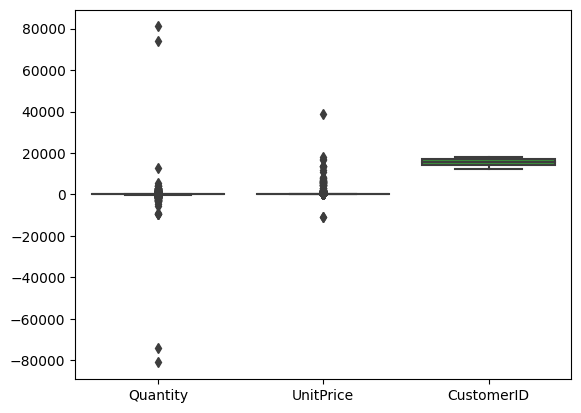

In [177]:
#checking for outliers
sns.boxplot(df)

In [178]:
#removing the outliers based on the stats of the data:
new_df = df[(df['Quantity'] >= 0) & (df['Quantity'] <= 100) & (df['UnitPrice'] < 21) & (df['UnitPrice'] > 0)]
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0


In [179]:
new_df.shape

(473765, 7)

<Axes: >

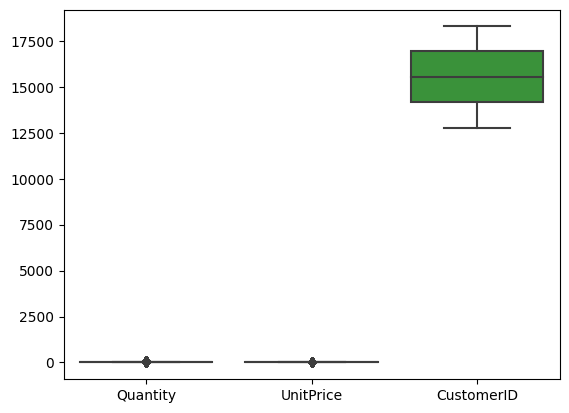

In [180]:
#re-checking for outliers
sns.boxplot(new_df)

In [181]:
#checking the stats of new df:
new_df.describe()

,Quantity,UnitPrice,CustomerID
count,473765.00000,473765.000000,345266.000000
mean,7.42326,3.175592,15545.962348
std,11.89854,3.067128,1592.960736
min,1.00000,0.001000,12747.000000
25%,1.00000,1.250000,14194.000000
50%,3.00000,2.100000,15513.000000
75%,10.00000,4.130000,16931.000000
max,100.00000,20.800000,18287.000000


<Axes: xlabel='CustomerID'>

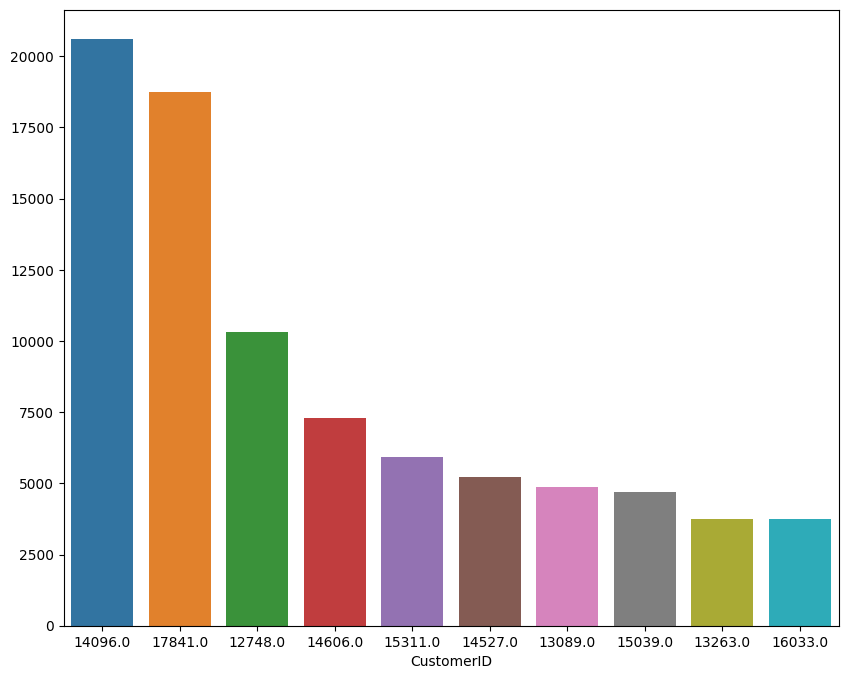

In [182]:
#fetching out top 10 customers with highest amount paid for items:
temp_df = new_df.groupby('CustomerID')['UnitPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=temp_df.index,y=temp_df.values,order=temp_df.index)

- Customer ID 14096 has the highest amount paid for purchasing the items.

<Axes: xlabel='InvoiceNo'>

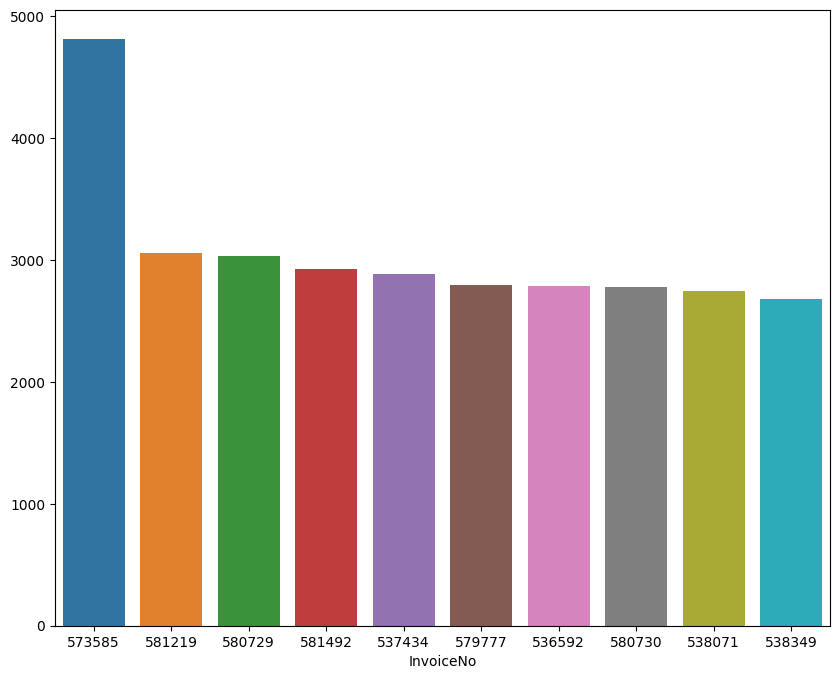

In [183]:
#fetching out top 10 customers with highest amount paid for items in a single invoice:
temp_df = new_df.groupby(['InvoiceNo'])['UnitPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=temp_df.index,y=temp_df.values,order=temp_df.index)

- Invoice number 573585 contains the details of the maximum bill amount among the customers.

In [184]:
#top items bought most frequently
new_df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2182
JUMBO BAG RED RETROSPOT               1901
PARTY BUNTING                         1592
REGENCY CAKESTAND 3 TIER              1443
LUNCH BAG RED RETROSPOT               1408
                                      ... 
SET/6 IVORY BIRD T-LIGHT CANDLES         1
WATERING CAN SINGLE HOOK PISTACHIO       1
COUNTRY COTTAGE  DOORSTOP GREEN          1
PINK FEATHERS CURTAIN                    1
BLACK SIL'T SQU CANDLE PLATE             1
Name: Description, Length: 3973, dtype: int64

#Segmenting the customers:

In [185]:
new_df[new_df['CustomerID'].isnull()].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
435385,574074,72351B,SET/6 PINK BUTTERFLY T-LIGHTS,1,11/2/2011 15:33,4.13,NaN
351969,567670,22418,10 COLOUR SPACEBOY PEN,2,9/21/2011 15:32,1.63,NaN
122931,546891,20717,STRAWBERRY SHOPPER BAG,1,3/17/2011 18:18,2.46,NaN
65167,541695,21231,SWEETHEART CERAMIC TRINKET BOX,1,1/20/2011 18:01,2.46,NaN
136446,547964,22427,ENAMEL FLOWER JUG CREAM,1,3/28/2011 15:45,11.63,NaN
319552,564857,22109,FULL ENGLISH BREAKFAST PLATE,1,8/31/2011 9:23,7.46,NaN
18428,537823,72586,SET OF 6 HALLOWEEN GHOST T-LIGHTS,1,12/8/2010 14:25,0.85,NaN
402890,571508,47563A,RETRO LONGBOARD IRONING BOARD COVER,2,10/17/2011 15:27,3.29,NaN
178145,552229,84923,PINK BUTTERFLY HANDBAG W BOBBLES,1,5/6/2011 15:40,4.13,NaN
93985,544323,22083,PAPER CHAIN KIT RETROSPOT,1,2/17/2011 15:51,5.79,NaN


In [186]:
#checking for various invoice numbers to see if we can fetch out missing customer id:
print(new_df[new_df['InvoiceNo']=='536544']['CustomerID'].count())
print(new_df[new_df['InvoiceNo']=='559816']['CustomerID'].count())
print(new_df[new_df['InvoiceNo']=='581498']['CustomerID'].count())


0
0
0


In [187]:
#dropping the null values as we need only those records which has the customer id:
new_df = new_df.dropna()
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0


In [188]:
new_df.shape

(345266, 7)

#Creating a new dataframe with recency of customers.

In [189]:
#converting the date column dtype to datetime
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'])  
new_df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541889   2011-12-09 12:31:00
541890   2011-12-09 12:49:00
541891   2011-12-09 12:49:00
541892   2011-12-09 12:49:00
541893   2011-12-09 12:49:00
Name: InvoiceDate, Length: 345266, dtype: datetime64[ns]

In [190]:
#grouping on customer id and getting the recent date to check the recency of each customer:
rec_df = new_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
rec_df.head()

,CustomerID,InvoiceDate
0,12747.0,2011-12-07 14:34:00
1,12748.0,2011-12-09 12:20:00
2,12749.0,2011-12-06 09:56:00
3,12820.0,2011-12-06 15:12:00
4,12821.0,2011-05-09 15:51:00


In [191]:
#we have the date when the customer recently bought an item.
#the difference between the last purcahse date and the date of last record in the data will give us the exact number of days of recency.
rec_df['recency']=rec_df['InvoiceDate'].max() - rec_df['InvoiceDate']
rec_df.head()

,CustomerID,InvoiceDate,recency
0,12747.0,2011-12-07 14:34:00,1 days 22:15:00
1,12748.0,2011-12-09 12:20:00,0 days 00:29:00
2,12749.0,2011-12-06 09:56:00,3 days 02:53:00
3,12820.0,2011-12-06 15:12:00,2 days 21:37:00
4,12821.0,2011-05-09 15:51:00,213 days 20:58:00


In [192]:
#cleaning the recency column:
rec_df['recency'] = rec_df['recency'].astype(str).str.split(" ",expand=True)[0].astype(int)
rec_df.head()

,CustomerID,InvoiceDate,recency
0,12747.0,2011-12-07 14:34:00,1
1,12748.0,2011-12-09 12:20:00,0
2,12749.0,2011-12-06 09:56:00,3
3,12820.0,2011-12-06 15:12:00,2
4,12821.0,2011-05-09 15:51:00,213


In [193]:
#keeping the required cols for segmentation:
rec_df = rec_df.drop(columns='InvoiceDate')
rec_df

,CustomerID,recency
0,12747.0,1
1,12748.0,0
2,12749.0,3
3,12820.0,2
4,12821.0,213
...,...,...
3872,18280.0,277
3873,18281.0,180
3874,18282.0,7
3875,18283.0,3


In [194]:
#importing KMeans and segmenting the customers based on recency:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [195]:
#getting the number of cluster using WCSS:

wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(rec_df['recency'].values.reshape(-1,1))
  wcss.append(km.inertia_)

wcss

[38514716.239876196,
 7896030.124265318,
 3799654.275068732,
 2170867.3685685964,
 1341434.1064518387,
 932524.1984987342,
 705015.1930358526,
 536485.0294827682,
 410295.4498203589,
 321099.54078583827]

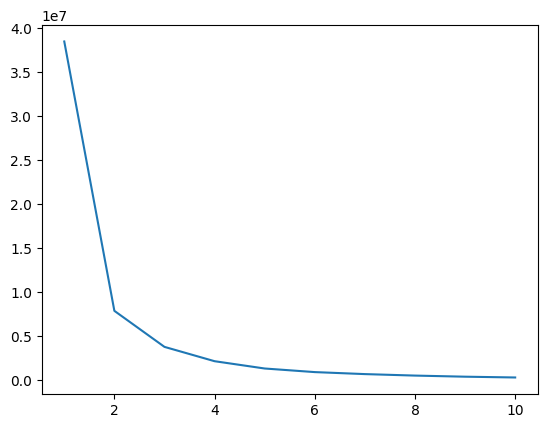

In [196]:
#plotting the wcss to get the clsuters using Elbow Method:
plt.plot(range(1,11),wcss)

#Creating a new dataframe with frequency of customers.

In [197]:
freq_df = new_df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
freq_df = freq_df.rename(columns={'InvoiceNo':'Frequency'})
freq_df.head()

,CustomerID,Frequency
0,12747.0,103
1,12748.0,4382
2,12749.0,198
3,12820.0,59
4,12821.0,6


# Creating a new dataframe with customers generating revenue

In [198]:
new_df['Total'] = new_df['UnitPrice'] * new_df['Quantity']
rev_df = new_df.groupby('CustomerID')['Total'].sum().reset_index().rename(columns={'Total':'Revenue'})
rev_df

,CustomerID,Revenue
0,12747.0,4196.01
1,12748.0,28992.24
2,12749.0,4040.88
3,12820.0,942.34
4,12821.0,92.72
...,...,...
3872,18280.0,180.60
3873,18281.0,80.82
3874,18282.0,178.05
3875,18283.0,2045.53


In [199]:
#merging all the created dataframes:
final_df = pd.merge(rec_df,freq_df,on='CustomerID')
final_df = pd.merge(final_df,rev_df,on='CustomerID')

In [200]:
final_df.sample(5)

,CustomerID,recency,Frequency,Revenue
1055,14331.0,123,28,462.66
150,13034.0,54,37,642.77
708,13838.0,5,165,674.82
879,14077.0,40,42,499.42
1369,14764.0,46,6,278.30


In [201]:
final_df.describe(percentiles=[0.01,0.10,0.25,0.5,0.75,0.9,0.95,0.99])

,CustomerID,recency,Frequency,Revenue
count,3877.000000,3877.000000,3877.000000,3877.000000
mean,15557.432293,91.345112,89.054939,1460.442302
std,1573.161949,99.683084,213.647441,3361.002985
min,12747.000000,0.000000,1.000000,2.900000
1%,12867.760000,0.000000,1.000000,39.211200
10%,13362.600000,4.000000,7.000000,143.724000
25%,14206.000000,17.000000,17.000000,279.770000
50%,15562.000000,50.000000,40.000000,612.680000
75%,16907.000000,143.000000,98.000000,1477.660000
90%,17727.400000,261.000000,201.000000,3138.824000


<Axes: >

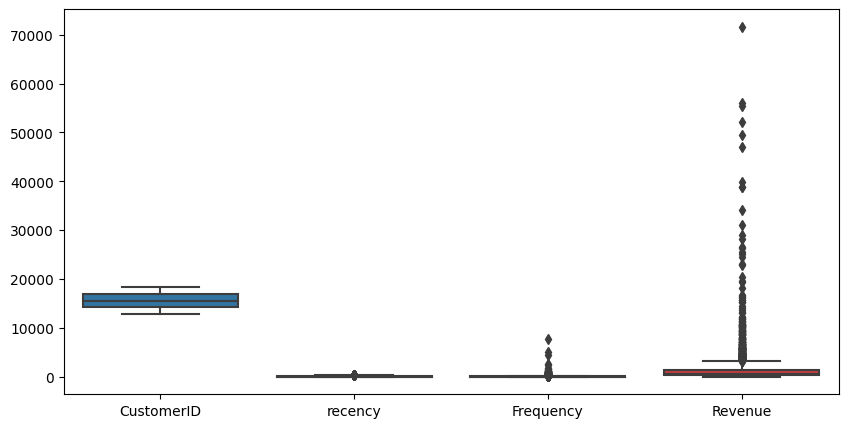

In [202]:
#checking for outliers:
plt.figure(figsize=(10,5))
sns.boxplot(final_df)

In [203]:
#removing the outliers based on stats:
final_cs_df = final_df[(final_df['Frequency'] <= 657) & (final_df['Revenue'] <= 5000)].reset_index(drop=True)
final_cs_df

,CustomerID,recency,Frequency,Revenue
0,12747.0,1,103,4196.01
1,12749.0,3,198,4040.88
2,12820.0,2,59,942.34
3,12821.0,213,6,92.72
4,12822.0,70,46,948.88
...,...,...,...,...
3675,18278.0,73,9,173.90
3676,18280.0,277,10,180.60
3677,18281.0,180,7,80.82
3678,18282.0,7,12,178.05


<Axes: >

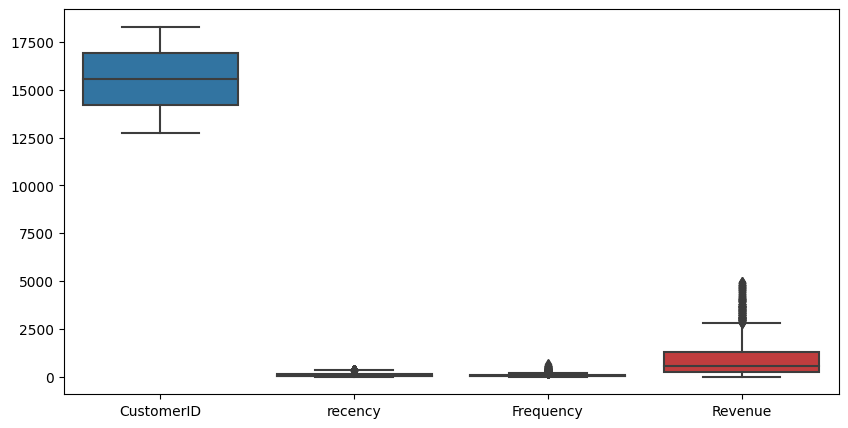

In [204]:
#checking for outliers:
plt.figure(figsize=(10,5))
sns.boxplot(final_cs_df)

In [205]:
#standardizing the data:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler()
final_cs_df[['recency','Frequency','Revenue']] = sc.fit_transform(final_cs_df[['recency','Frequency','Revenue']])

In [206]:
final_cs_df.head()

,CustomerID,recency,Frequency,Revenue
0,12747.0,0.002681,0.155963,0.844121
1,12749.0,0.008043,0.301223,0.812891
2,12820.0,0.005362,0.088685,0.189120
3,12821.0,0.571046,0.007645,0.018082
4,12822.0,0.187668,0.068807,0.190437


In [207]:
#defining a function to order the cluster according to range:

def rec_cluster_order(df,col,cluster_col):

  #applying KMeans:
  X = df[col].values.reshape(-1,1)
  km = KMeans(n_clusters=3)
  preds = km.fit_predict(X)
  df[cluster_col] = 0

  #creating a list of cluster ranges:
  cluster_range = []
  for i in range(0,3):
    min = X[preds==i].min()
    max = X[preds==i].max()
    cluster_range.append([min,max])
  cluster_range.sort(reverse=True)  #sorting in descending order as we need recent customers with higher cluster number.
  print(cluster_range)
  score = silhouette_score(X,km.labels_)
  print('silhoutte score:',score)

  #assigning the cluster number depending on recency:
  for i in range(len(df)):
    if (df[col][i] >= cluster_range[0][0]) & (df[col][i] <= cluster_range[0][1]):
      df[cluster_col][i] = 0
    elif (df[col][i] >= cluster_range[1][0]) & (df[col][i] <= cluster_range[1][1]):
      df[cluster_col][i] = 1
    # elif (df[col][i] >= cluster_range[2][0]) & (df[col][i] <= cluster_range[2][1]):
    #   df[cluster_col][i] = 2
    else:
      df[cluster_col][i] = 2

  return df

In [208]:
#applying cluster_order function on rec_df:
rec_cluster_order(final_cs_df,'recency','recency_cluster')

[[0.6193029490616622, 1.0], [0.26005361930294907, 0.6085790884718498], [0.0, 0.257372654155496]]
silhoutte score: 0.676669473596549


,CustomerID,recency,Frequency,Revenue,recency_cluster
0,12747.0,0.002681,0.155963,0.844121,2
1,12749.0,0.008043,0.301223,0.812891,2
2,12820.0,0.005362,0.088685,0.189120,2
3,12821.0,0.571046,0.007645,0.018082,1
4,12822.0,0.187668,0.068807,0.190437,2
...,...,...,...,...,...
3675,18278.0,0.195710,0.012232,0.034424,2
3676,18280.0,0.742627,0.013761,0.035773,0
3677,18281.0,0.482574,0.009174,0.015686,1
3678,18282.0,0.018767,0.016820,0.035260,2


In [209]:
#defining a function to order the cluster according to range of frequency:

def freq_cluster_order(df,col,cluster_col):

  #applying KMeans:
  X = df[col].values.reshape(-1,1)
  km = KMeans(n_clusters=3)
  preds = km.fit_predict(X)
  df[cluster_col] = 0

  #creating a list of cluster ranges:
  cluster_range = []
  for i in range(0,3):
    min = X[preds==i].min()
    max = X[preds==i].max()
    cluster_range.append([min,max])
  cluster_range.sort() #sorting in ascending order as we need most frequent to be in higher cluster number.
  print(cluster_range)
  score = silhouette_score(X,km.labels_)
  print('silhoutte score:',score)

  #assigning the cluster number:
  for i in range(len(df)):
    if (df[col][i] >= cluster_range[0][0]) & (df[col][i] <= cluster_range[0][1]):
      df[cluster_col][i] = 0
    elif (df[col][i] >= cluster_range[1][0]) & (df[col][i] <= cluster_range[1][1]):
      df[cluster_col][i] = 1
    # elif (df[col][i] >= cluster_range[2][0]) & (df[col][i] <= cluster_range[2][1]):
    #   df[cluster_col][i] = 2
    else:
      df[cluster_col][i] = 2

  return df

In [210]:
#applying cluster_order function on freq_df:
freq_cluster_order(final_cs_df,'Frequency','frequency_cluster')

[[0.0, 0.12538226299694188], [0.12691131498470948, 0.3669724770642202], [0.37767584097859325, 1.0]]
silhoutte score: 0.6780411076368817


,CustomerID,recency,Frequency,Revenue,recency_cluster,frequency_cluster
0,12747.0,0.002681,0.155963,0.844121,2,1
1,12749.0,0.008043,0.301223,0.812891,2,1
2,12820.0,0.005362,0.088685,0.189120,2,0
3,12821.0,0.571046,0.007645,0.018082,1,0
4,12822.0,0.187668,0.068807,0.190437,2,0
...,...,...,...,...,...,...
3675,18278.0,0.195710,0.012232,0.034424,2,0
3676,18280.0,0.742627,0.013761,0.035773,0,0
3677,18281.0,0.482574,0.009174,0.015686,1,0
3678,18282.0,0.018767,0.016820,0.035260,2,0


In [234]:
#defining a function to order the cluster according to range:

def rev_cluster_order(df,col,cluster_col):

  #applying KMeans:
  X = df[col].values.reshape(-1,1)
  km = KMeans(n_clusters=3)
  preds = km.fit_predict(X)
  df[cluster_col] = 0

  #creating a list of cluster ranges:
  cluster_range = []
  for i in range(0,3):
    min = X[preds==i].min()
    max = X[preds==i].max()
    cluster_range.append([min,max])
  cluster_range.sort() #sorting in ascending order as we need most revenue generator to be in higher cluster number.
  print(cluster_range)
  score = silhouette_score(X,km.labels_)
  print('silhoutte score:',score)

  #assigning the cluster number:
  for i in range(len(df)):
    if (df[col][i] >= cluster_range[0][0]) & (df[col][i] <= cluster_range[0][1]):
      df[cluster_col][i] = 0
    elif (df[col][i] >= cluster_range[1][0]) & (df[col][i] <= cluster_range[1][1]):
      df[cluster_col][i] = 1
    # elif (df[col][i] >= cluster_range[2][0]) & (df[col][i] <= cluster_range[2][1]):
    #   df[cluster_col][i] = 2
    else:
      df[cluster_col][i] = 2

  return df

In [235]:
#applying cluster_order function on freq_df:
rev_cluster_order(final_cs_df,'Revenue','revenue_cluster')

[[0.0, 0.20078189325264773], [0.2013435518970574, 0.5096679772035035], [0.5104047767155249, 0.9999999999999999]]
silhoutte score: 0.6655022581647642


,CustomerID,recency,Frequency,Revenue,recency_cluster,frequency_cluster,revenue_cluster,Overall_Score
0,12747.0,0.002681,0.155963,0.844121,2,1,2,6
1,12749.0,0.008043,0.301223,0.812891,2,1,2,6
2,12820.0,0.005362,0.088685,0.189120,2,0,0,2
3,12821.0,0.571046,0.007645,0.018082,1,0,0,1
4,12822.0,0.187668,0.068807,0.190437,2,0,0,2
...,...,...,...,...,...,...,...,...
3675,18278.0,0.195710,0.012232,0.034424,2,0,0,2
3676,18280.0,0.742627,0.013761,0.035773,0,0,0,0
3677,18281.0,0.482574,0.009174,0.015686,1,0,0,1
3678,18282.0,0.018767,0.016820,0.035260,2,0,0,2


In [236]:
#getting the over-all score by adding all the cluster scores to segment the customers:
final_cs_df['Overall_Score'] = final_cs_df['recency_cluster'] + final_cs_df['frequency_cluster'] + final_cs_df['revenue_cluster'] 
final_cs_df.sample(5)

,CustomerID,recency,Frequency,Revenue,recency_cluster,frequency_cluster,revenue_cluster,Overall_Score
1391,14905.0,0.420912,0.024465,0.123454,1,0,0,1
2404,16387.0,0.863271,0.004587,0.018412,0,0,0,0
1319,14800.0,0.126005,0.582569,0.868556,2,2,2,6
3669,18270.0,0.099196,0.015291,0.056418,2,0,0,2
59,12906.0,0.029491,0.093272,0.559893,2,0,2,4


In [237]:
final_cs_df['Overall_Score'].value_counts()

2    1343
1     576
3     537
0     505
4     371
5     264
6      84
Name: Overall_Score, dtype: int64

In [238]:
final_cs_df.sample(5)

,CustomerID,recency,Frequency,Revenue,recency_cluster,frequency_cluster,revenue_cluster,Overall_Score
3375,17837.0,0.109920,0.246177,0.309683,2,1,1,4
219,13159.0,0.021448,0.181957,0.287161,2,1,1,4
1233,14670.0,0.747989,0.186544,0.078503,0,1,0,1
3103,17429.0,0.340483,0.058104,0.105089,1,0,0,1
84,12944.0,0.093834,0.044343,0.121111,2,0,0,2


#Final Clustering using all the above features:

### KMEANS

In [239]:
X = final_cs_df.drop(columns=['CustomerID'])
wcss = []
score = []
for i in range(2,20):
  km = KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)
  labels = km.labels_
  score.append(silhouette_score(X,labels))

wcss

[5724.281852684126,
 2510.9926587206123,
 1801.8978123703432,
 1309.0917302494652,
 919.6608604899802,
 666.8431186708931,
 528.983900591184,
 365.41706075032187,
 286.9593449386177,
 229.47758064409055,
 178.10042104971365,
 137.94338859248774,
 110.08780828349204,
 94.86237500869248,
 83.5138379726501,
 77.98346545077598,
 69.40909713106511,
 63.248381237662215]

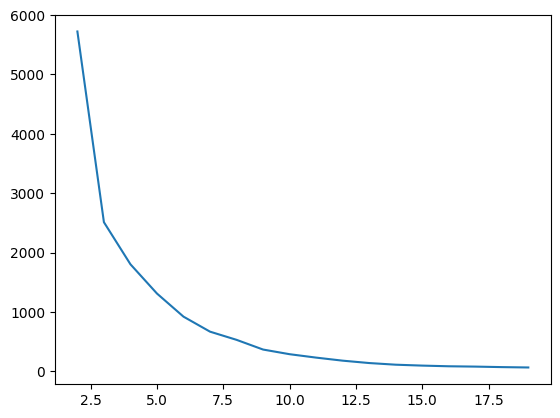

In [240]:
#plotting the wcss to get the clsuters using Elbow Method:
plt.plot(range(2,20),wcss)

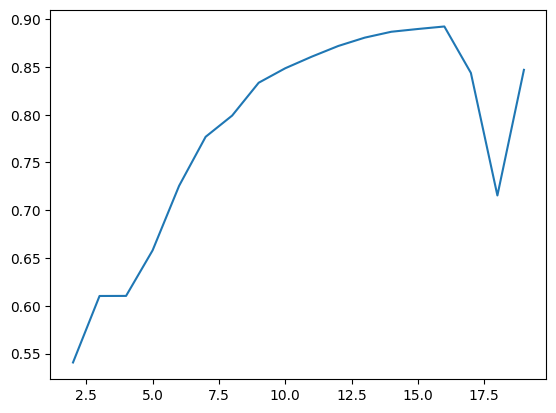

In [241]:
#plotting the wcss to get the clsuters using Elbow Method:
plt.plot(range(2,20),score)

In [242]:
X = final_cs_df.drop(columns=['CustomerID'])
km = KMeans(n_clusters=10)
preds = km.fit_predict(X)
labels = km.labels_
print(silhouette_score(X,labels))

0.8486177542819284


## DBSCAN

In [221]:
from sklearn.cluster import DBSCAN

In [249]:
X = final_cs_df.drop(columns=['CustomerID'])
db = DBSCAN()
preds = db.fit_predict(X)
labels = db.labels_
print(silhouette_score(X,labels))

0.8931073112434585


In [244]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 16
Estimated number of noise points: 20


In [261]:
x = X[['recency_cluster','frequency_cluster',  'revenue_cluster','Overall_Score']]
pd.pivot_table(data=x,values=x,index=labels)

,Overall_Score,frequency_cluster,recency_cluster,revenue_cluster
-1,3.2,1.15,0.7,1.35
0,5.0,1.00,2.0,2.00
1,2.0,0.00,2.0,0.00
2,1.0,0.00,1.0,0.00
3,3.0,0.00,2.0,1.00
4,4.0,1.00,2.0,1.00
5,0.0,0.00,0.0,0.00
6,3.0,1.00,2.0,0.00
7,4.0,1.00,1.0,2.00
8,6.0,2.00,2.0,2.00


- By looking at the above pivot table we can observe the target customers based on the values. For eg: cluster no.8 is having customers with higher overall score,recency,frequency and revenue generation.

In [262]:
# Checking cluster no 8 to find out the customers:
final_cs_df[preds==8]

,CustomerID,recency,Frequency,Revenue,recency_cluster,frequency_cluster,revenue_cluster,Overall_Score
20,12841.0,0.010724,0.631498,0.802967,2,2,2,6
36,12867.0,0.067024,0.814985,0.806542,2,2,2,6
166,13069.0,0.000000,0.639144,0.805998,2,2,2,6
212,13148.0,0.075067,0.475535,0.740898,2,2,2,6
231,13174.0,0.040214,0.441896,0.531063,2,2,2,6
...,...,...,...,...,...,...,...,...
3337,17769.0,0.032172,0.463303,0.796092,2,2,2,6
3358,17799.0,0.056300,0.616208,0.611236,2,2,2,6
3465,17965.0,0.099196,0.493884,0.517630,2,2,2,6
3474,17975.0,0.037534,0.446483,0.901947,2,2,2,6
